In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1789)

from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# An Introduction to Bayesian Statistical Analysis

Though many of you will have taken a statistics course or two during your undergraduate (or graduate education, most of those who have will likely not have had a course in *Bayesian* statistics. Most introductory courses, particularly for non-statisticians, still do not cover Bayesian methods at all. Even today, Bayesian courses (similarly to statistical computing courses!) are typically tacked onto the curriculum, rather than being integrated into the program.

In fact, Bayesian statistics is not just a particular method, or even a class of methods; it is an entirely **different paradigm** for doing statistical analysis.

> Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn.
*-- Gelman et al. 2013*

A Bayesian model is described by parameters, uncertainty in those parameters is described using probability distributions.

All conclusions from Bayesian statistical procedures are stated in terms of **probability statements**

![prob model](images/prob_model.png)

This confers several benefits to the analyst, including:

- ease of interpretation, summarization of uncertainty
- can incorporate uncertainty in parent parameters
- easy to calculate summary statistics

### Bayesian vs Frequentist Statistics: *What's the difference?*

Any statistical paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*.
2. Some **data** which have been observed, and hopefully contain information about (1).
3. One or more **models** that relate the data to the parameters, and is the instrument that is used to learn.


### The Frequentist World View

![Fisher](images/fisher.png)

- The **data** that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model **parameters** are considered **fixed**. A parameter's true value is uknown and fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

<div style="font-size:35px">
\\[f(y | \theta)\\]
</div>

Here, the model \\(f\\) accepts data values \\(y\\) as an argument, conditional on particular values of \\(\theta\\).

Frequentist inference typically involves deriving **estimators** for the unknown parameters. Estimators are formulae that return estimates for particular estimands, as a function of data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

> For example, lets say that we have collected some data on the prevalence of autism spectrum disorder (ASD) in some defined population. Our sample includes \\(n\\) sampled children, \\(y\\) of them having been diagnosed with autism. A frequentist estimator of the prevalence \\(p\\) is:

> <div style="font-size:25px">
> \\[\hat{p} = \frac{y}{n}\\]
> </div>

> Why this particular function? Because it can be shown to be unbiased and minimum-variance.

It is important to note that, in a frequentist world, new estimators need to be derived for every estimand that is introduced.

### The Bayesian World View

![Bayes](images/bayes.png)

- Data are considered **fixed**. They used to be random, but once they were written into your lab notebook/spreadsheet/IPython notebook they do not change.
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

<div style="font-size:35px">
\\[p(\theta | y)\\]
</div>

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

## Bayesian Inference, in 3 Easy Steps

![123](images/123.png)

Gelman et al. (2013) describe the process of conducting Bayesian statistical analysis in 3 steps.

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?


## Probability

> *Misunderstanding of probability may be the greatest of all impediments to scientific literacy.*
> — Stephen Jay Gould

Because of its reliance on probabilty models, its worth talking a little bit about probability. There are  different ways to define probability, depending on how it is being used. In fact, Bayesian statistics invokes an additional definition of probability that is not used elsewhere.

### 1. Classical probability

<div style="font-size:25px">
\\[Pr(X=x) = \frac{\text{# x outcomes}}{\text{# possible outcomes}}\\]
</div>

Classical probability is an assessment of **possible** outcomes of elementary events. Elementary events are assumed to be equally likely.

### 2. Frequentist probability

<div style="font-size:25px">
\\[Pr(X=x) = \lim_{n \rightarrow \infty} \frac{\text{# times x has occurred}}{\text{# independent and identical trials}}\\]
</div>

Unlike classical probability, frequentist probability is an EMPIRICAL definition. It is an objective statement desribing events that have occurred.

### 3. Subjective probability

<div style="font-size:25px">
\\[Pr(X=x)\\]
</div>

Subjective probability is a measure of one's uncertainty in the value of \\(X\\). It characterizes the state of knowledge regarding some unknown quantity using probability.

It is not associated with long-term frequencies nor with equal-probability events.

For example:

- X = the true prevalence of diabetes in Austin is < 15%
- X = the blood type of the person sitting next to you is type A
- X = the Nashville Predators will win next year's Stanley Cup
- X = it is raining in Nashville


## Bayes' Formula

Now that we have some probability under our belt, we turn to Bayes' formula. While frequentist statistics uses different estimators for different problems, Bayes formula is the **only estimator** that Bayesians need to obtain estimates of unknown quantities that we care about. It turns out to be straightforward to derive Bayes' formula directly from the definition of conditional probability.

Recall that the goal in Bayesian inference is to calculate the **posterior distribution** of our unknowns:

<div style="font-size: 150%;">  
\\[Pr(\theta|Y=y)\\]
</div>

This expression is a **conditional probability**. It is the probability of \\(\theta\\) *given* the observed values of \\(Y=y\\).

In general, the conditional probability of A given B is defined as follows:

\\[Pr(B|A) = \frac{Pr(A \cap B)}{Pr(A)}\\]

To gain an intuition for this, it is helpful to use a Venn diagram:

![conditional probability](images/conditional.png)

Notice from this diagram that the following conditional probability is also true:

\\[Pr(A|B) = \frac{Pr(A \cap B)}{Pr(B)}\\]

These can both be rearranged to be expressions of the joint probability of A and B. Setting these equal to one another:

\\[Pr(B|A)Pr(A) = Pr(A|B)Pr(B)\\]

Then rearranging:

\\[Pr(B|A) = \frac{Pr(A|B)Pr(B)}{Pr(A)}\\]

This is Bayes' formula. Replacing the generic A and B with things we care about reveals why Bayes' formula is so important:

![bayes formula](images/bayes_formula.png)

The equation expresses how our belief about the value of \\(\theta\\), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\).

The innocuous denominator \\(P(y)\\) usuallt cannot be computed directly, and is actually the expression in the numerator, integrated over all \\(\theta\\):

<div style="font-size: 150%;">  
\\[Pr(\theta|y) = \frac{Pr(y|\theta)Pr(\theta)}{\int Pr(y|\theta)Pr(\theta) d\theta}\\]
</div>

The intractability of this integral is one of the factors that has contributed to the under-utilization of Bayesian methods by statisticians.

### Priors

Once considered a controversial aspect of Bayesian analysis, the prior distribution characterizes what is known about an unknown quantity before observing the data from the present study. Thus, it represents the information state of that parameter. It can be used to reflect the information obtained in previous studies, to constrain the parameter to plausible values, or to represent the population of possible parameter values, of which the current study's parameter value can be considered a sample.

### Likelihood functions

The likelihood represents the information in the observed data, and is used to update prior distributions to posterior distributions. This updating of belief is justified becuase of the **likelihood principle**, which states:

> Following observation of \\(y\\), the likelihood \\(L(\theta|y)\\) contains all experimental information from \\(y\\) about the unknown \\(\theta\\).

Bayesian analysis satisfies the likelihood principle because the posterior distribution's dependence on the data is **only through the likelihood**. In comparison, most frequentist inference procedures violate the likelihood principle, because inference will depend on the design of the trial or experiment.

Remember from the density estimation section that the likelihood is closely related to the probability density (or mass) function. The difference is that the likelihood varies the parameter while holding the observations constant, rather than *vice versa*.

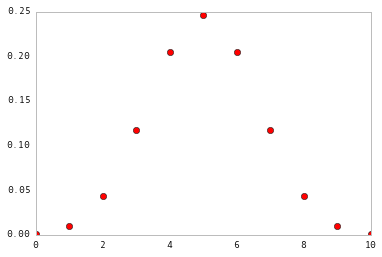

In [2]:
from scipy.stats import binom

# Binomial probability mass function
yvals = range(10+1)
plt.plot(yvals, binom.pmf(yvals, 10, 0.5), 'ro')

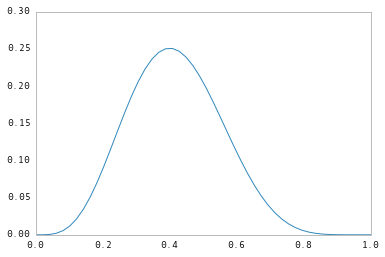

In [3]:
# Binomial likelhood function
pvals = np.linspace(0, 1)
y = 4
plt.plot(pvals, binom.pmf(y, 10, pvals));

## Bayesian Computation

Bayesian analysis usually requires integration over multiple dimensions that is **intractable** both via analytic methods or via standard methods of numerical integration.

Following the steps for setting up a Bayesian model, after observing data $y$ that we hypothesize as having being obtained from a sampling model $f(y|\theta)$, we then place a **prior** distribution $p(\theta)$ on the parameters to describe the uncertainty in their true values. We then obtain inference by calculating the **posterior** distribution, which is proportional to the product of these quantities:

$$p(\theta | y) \propto f(y|\theta) p(\theta)$$

unfortunately, for most problems of interest, the normalizing constant cannot be calculated because it involves **multi-dimensional integration** over $\theta$.

One approach is to work with **non-normalized posteriors**, and obtain approximate inference.

## Approximation Methods

[Tsutakawa et al. (1985)](http://onlinelibrary.wiley.com/doi/10.1002/sim.4780040210/abstract) provides mortality data for stomach cancer among men aged 45-64 in several cities in Missouri. The file `cancer.csv` contains deaths $y_i$ and subjects at risk $n_i$ for 20 cities from this dataset.

In [4]:
cancer = pd.read_csv('../data/cancer.csv')
cancer

,y,n
0,0,1083
1,0,855
2,2,3461
3,0,657
4,1,1208
5,1,1025
6,0,527
7,2,1668
8,1,583
9,3,582


If we use a simple binomial model, which assumes independent samples from a binomial distribution with probability of mortality $p$, we can use MLE to obtain an estimate of this probability.

$$L(p \mid n, y) = \frac{n!}{y!(n-y)!} p^y (1-p)^{n-y}$$

$$\hat{p} = \frac{y}{n}$$

In [5]:
ytotal, ntotal = cancer.sum().astype(float)
p_hat = ytotal/ntotal
p_hat

0.00099331262766165821

However, if we compare the variation of $y$ under this model, it is to small relative to the observed variation:

In [6]:
cancer.y.var()

141.94473684210527

$$Var(y) = np(1-p)$$

In [7]:
p_hat*(1.-p_hat)*ntotal

70.929474803436037

Hence, the data are strongly **overdispersed** relative to what is predicted under a model with a fixed probability of death. A more realistic model would allow for these probabilities to vary among the cities. 

One way of representing this is conjugating the binomial distribution with another distribution that describes the variation in the binomial probability. A sensible choice for this is the **beta distribution**:

$$f(p \mid \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} p^{\alpha - 1} (1 - p)^{\beta - 1}$$

Conjugating this with the binomial distribution, and reparameterizing such that $\alpha = K\eta$ and $\beta = K(1-\eta)$ for $K > 0$ and $\eta \in (0,1)$ results in the **beta-binomial distribution**:

$$f(y \mid K, \eta) = \frac{n!}{y!(n-y)!} \frac{B(K\eta+y, K(1-\eta) + n - y)}{B(K\eta, K(1-\eta))}$$

where $B$ is the beta function.

What remains is to place priors over the parameters $K$ and $\eta$. Common choices for diffuse (*i.e.* vague or uninformative) priors are:

$$\begin{aligned}
p(K) &\propto \frac{1}{(1+K)^2} \cr
p(\eta) &\propto \frac{1}{\eta(1-\eta)}
\end{aligned}$$

These are not normalized, but our posterior will not be normalized anyhow, so this is not an issue.

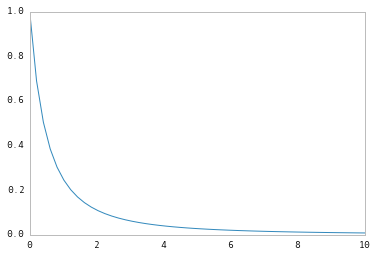

In [8]:
K_x = np.linspace(0, 10)
K_prior = lambda K: 1./(1. + K)**2
plt.plot(K_x, K_prior(K_x))

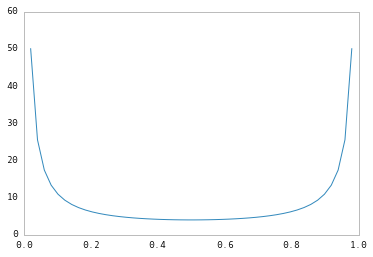

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

eta_x = np.linspace(0, 1)
eta_prior = lambda eta: 1./(eta*(1.-eta)) 
plt.plot(eta_x, eta_prior(eta_x))

Now, by multiplying these quantities together, we can obtain a non-normalized posterior.

$$p(K, \eta | \mathbf{y}) \propto \frac{1}{(1+K)^2} \frac{1}{\eta(1-\eta)} \prod_i \frac{B(K\eta+y_i, K(1-\eta) + n_i - y_i)}{B(K\eta, K(1-\eta))}$$

This can be calculated in Python as follows (log-transformed):

In [10]:
from scipy.special import betaln

def betabin_post(params, n, y):

    K, eta = params
    post = betaln(K*eta + y, K*(1.-eta) + n - y).sum()
    post -= len(y)*betaln(K*eta, K*(1.-eta))
    post -= np.log(eta*(1.-eta))
    post -= 2.*np.log(1.+K)
    
    return post
        
betabin_post((15000, 0.003), cancer.n, cancer.y)        

-605.06645607721157

An easy (though computationally expensive) way of getting the joint posterior distribution of the parameters is to evaluate `betabin_post` on a grid of parameter values.

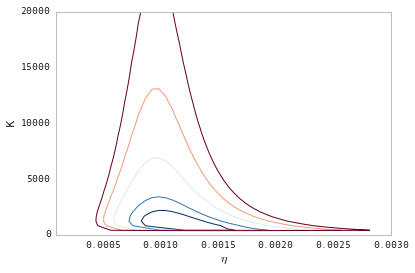

In [11]:
# Create grid
K_x = np.linspace(1, 20000)
eta_x = np.linspace(0.0001, 0.003)

# Calculate posterior on grid
z = np.array([[betabin_post((K, eta), cancer.n, cancer.y) 
               for eta in eta_x] for K in K_x])

# Plot posterior
x, y = np.meshgrid(eta_x, K_x)
cplot = plt.contour(x, y, z-z.max(), [-0.5, -1, -2, -3, -4], cmap=plt.cm.RdBu)
plt.ylabel('K');plt.xlabel('$\eta$');

This is fine, but the precision parameter $K$ is heavily skewed.

To deal with the skewness in $K$ and to facilitate modeling, we can transform the beta-binomial parameters to the real line via:

$$\begin{aligned}
\theta_1 &= \log(K) \cr
\theta_2 &= \log\left(\frac{\eta}{1-\eta}\right)
\end{aligned}$$

which we can easily implement by wrapping `betabin_post`:

In [12]:
def betabin_trans(theta, n, y):
    K = np.exp(theta[0])
    eta = 1./(1. + np.exp(-theta[1]))
    
    # Jacobians for transformation
    J = theta[0] + theta[1]
    
    return betabin_post((K, eta), n, y) + J

betabin_trans((10, -7.5), cancer.n, cancer.y)

-576.79558024494156

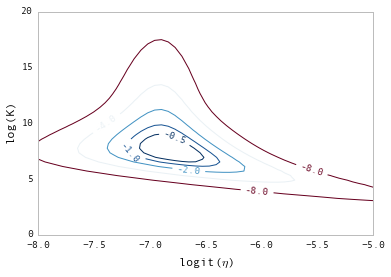

In [13]:
# Create grid
log_K_x = np.linspace(0, 20)
logit_eta_x = np.linspace(-8, -5)

# Calculate posterior on grid
z = np.array([[betabin_trans((t1, t2), cancer.n, cancer.y) 
             for t2 in logit_eta_x] for t1 in log_K_x])

# Plot posterior
x, y = np.meshgrid(logit_eta_x, log_K_x)
cplot = plt.contour(x, y, z - z.max(), [-0.5, -1, -2, -4, -8], cmap=plt.cm.RdBu)
plt.clabel(cplot, inline=1, fontsize=10, fmt='%1.1f')
plt.ylabel('log(K)');plt.xlabel('logit($\eta$)');

## Normal Approximation

An alternative approach to summarizing a $p$-dimensional posterior distribution involves **estimating the mode** of the posterior, and approximating the density as having a **multivariate normal** distribution. 

$$p(x \mid \theta, \Sigma) = (2\pi |\Sigma|)^{-1/2} \exp\left\{ -\frac{1}{2} (x-\theta)^{\prime}\Sigma^{-1}(x-\theta) \right\}$$

which, when log-transformed, becomes:

$$l(x \mid \theta, \Sigma) \propto - \frac{1}{2} \log|\Sigma| -\frac{1}{2} (x-\theta)^{\prime}\Sigma^{-1}(x-\theta)$$

If we consider the logarithm of the unnormalized joint posterior:

$$h(\theta | y) = \log[f(y|\theta) p(\theta)]$$

one way to approximate this function is to use a second-order Taylor series expansion around the mode $\hat{\theta}$:

$$h(\theta | y) \approx h(\hat{\theta} | y) + \frac{1}{2}(\theta-\hat{\theta})' h''(\hat{\theta} | y) (\theta-\hat{\theta})$$

This form is simply the multivariate normal distribution with $\hat{\theta}$ as the mean and the inverse negative Hessian as the covariance matrix:

$$\Sigma = -h''(\hat{\theta} | y)^{-1}$$

We can apply one of several numerical methods for **multivariate optimization** to numerically estimate the mode of the posterior. Here, we will use the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm that is provided by SciPy's `fmin_bfgs` function. In addition to returning an estimate of the mode, it returns the estimated variance-covariance matrix, which we will need to parameterize the multivariate normal distribution.

Applying this to the beta-binomial posterior estimation problem, we simply provide an initial guess for the mode:

In [14]:
from scipy.optimize import fmin_bfgs

betabin_trans_min = lambda *args: -betabin_trans(*args)

init_value = (10, -7.5)

opt = fmin_bfgs(betabin_trans_min, init_value, 
          args=(cancer.n, cancer.y), full_output=True)
mode, var = opt[0], opt[3]
mode, var

         Current function value: 571.374017
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 24


(array([ 7.57184062, -6.81775825]), array([[ 1.30212708, -0.17259339],
        [-0.17259339,  0.08374836]]))

Thus, our approximated mode is $\log(K)=7.6$, $\text{logit}(\eta)=-6.8$. We can plug this value, along with the variance-covariance matrix, into a function that returns the kernel of a multivariate normal distribution, and use this to plot the approximate posterior:

In [15]:
det = np.linalg.det 
inv = np.linalg.inv

def lmvn(value, mu, Sigma):
    # Log kernel of multivariate normal
    delta = np.array(value) - mu
    return 1 / (2. * (np.log(det(Sigma))) - np.dot(delta.T, np.dot(inv(Sigma), delta)))

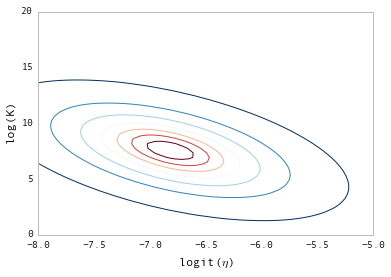

In [16]:
z = np.array([[lmvn((t1, t2), mode, var) 
             for t2 in logit_eta_x] for t1 in log_K_x])
x, y = np.meshgrid(logit_eta_x, log_K_x)
cplot = plt.contour(x, y, z - z.max(), cmap=plt.cm.RdBu)
plt.ylabel('log(K)');plt.xlabel('logit($\eta$)');

Along with this, we can estimate a 95% probability interval for the estimated mode:

In [17]:
from scipy.stats.distributions import norm

se = np.sqrt(np.diag(var))

mode[0] + norm.ppf(0.025)*se[0], mode[0] + norm.ppf(0.975)*se[0]

(5.335310377062445, 9.8083708679165369)

In [18]:
mode[1] + norm.ppf(0.025)*se[1], mode[1] + norm.ppf(0.975)*se[1]

(-7.384958281767668, -6.2505582216465072)

Of course, this approximation is only reasonable for posteriors that are not strongly skewed, bimodal, or leptokurtic (heavy-tailed).

## Monte Carlo Methods

It is often possible to compute integrals required by Bayesian analysis by **simulating**
(drawing samples) from posterior distributions. For example, consider the expected value of a random variable $\mathbf{x}$:

$$\begin{gathered}
\begin{split}E[{\bf x}] = \int {\bf x} f({\bf x}) d{\bf x}, \qquad
{\bf x} = \{x_1,...,x_k\}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

where $k$ (the dimension of vector $x$) is perhaps very large. If we can produce a reasonable number of random vectors $\{{\bf x_i}\}$, we can use these values to approximate the unknown integral. This process is known as **Monte Carlo integration**. In general, MC integration allows integrals over probability density functions ...

$$\begin{gathered}
\begin{split}I = \int h(\mathbf{x}) f(\mathbf{x}) \mathbf{dx}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

... to be estimated by finite sums:

$$\begin{gathered}
\begin{split}\hat{I} = \frac{1}{n}\sum_{i=1}^n h(\mathbf{x}_i),\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

where $\mathbf{x}_i$ is a sample from $f$. This estimate is valid and useful because:

-   By the strong law of large numbers:

$$\begin{gathered}
\begin{split}\hat{I} \rightarrow I   \mbox{   with probability 1}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

-   Simulation error can be measured and controlled:

$$Var(\hat{I}) = \frac{1}{n(n-1)}\sum_{i=1}^n
   (h(\mathbf{x}_i)-\hat{I})^2$$

### How is this relevant to Bayesian analysis? 

In the integral $I$ above, if we replace $f(\mathbf{x})$
with a posterior, $p(\theta|y)$ and make $h(\theta)$ an interesting function of the unknown parameter, the resulting expectation is that of the posterior of $h(\theta)$:

$$E[h(\theta)|y] = \int h(\theta) p(\theta|y) d\theta \approx \frac{1}{n}\sum_{i=1}^n h(\theta)$$

We also require integrals to obtain marginal estimates from a joint model. If $\theta$ is of length $K$, then inference about any particular parameter is obtained by:

$$p(\theta_i|y) \propto \int p(\theta|y) d\theta_{-i}$$

where the `-i` subscript indicates all elements except the $i^{th}$.

## Rejection Sampling

Though Monte Carlo integration allows us to estimate integrals that are unassailable by analysis and standard numerical methods, it relies on the ability to **draw samples** from the posterior distribution. For known parametric forms, this is not a problem; probability integral transforms or bivariate techniques (e.g Box-Muller method) may be used to obtain samples from uniform pseudo-random variates generated from a computer. Often, however, we cannot readily generate random values from non-standard posteriors. In such instances, we can use **rejection sampling** to generate samples.

Consider a function, $f(x)$ which can be evaluated for any value on the support of $x:S_x = [A,B]$, but may not be integrable or easily sampled from. If we can calculate the maximum value of $f(x)$, we can then define a **rectangle** that is guaranteed to contain all possible values
$(x,f(x))$. It is then trivial to generate points over the box and enumerate the values that fall under the curve.


$$\begin{gathered}
\begin{split}\frac{\mbox{Points under curve}}{\mbox{Points generated}} \times \mbox{box area} = \lim_{n \to \infty} \int_A^B f(x) dx\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

### Example: triangular distribution

In [19]:
def rtriangle(low, high, mode):
    alpha = -1
    # Run until accepted
    while np.random.random() > alpha:
        u = np.random.uniform(low, high)
        if u < mode:
            alpha = (u - low) / (mode - low)
        else:
            alpha = (high - u) / (high - mode)
    return(u)

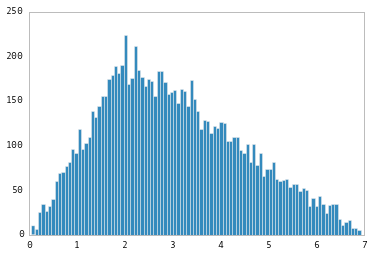

In [20]:
_ = plt.hist([rtriangle(0, 7, 2) for t in range(10000)], bins=100)

This approach is useful, for example, in estimating the normalizing constant for posterior distributions.


If $f(x)$ has unbounded support (i.e. infinite tails), such as a Gaussian distribution, a bounding box is no longer appropriate. We must specify a majorizing (or, enveloping) function, $g(x)$, which implies:

$$\begin{gathered}
\begin{split}cg(x) \ge  f(x) \qquad\forall x \in (-\infty,\infty)\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

Having done this, we can now sample ${x_i}$ from $g(x)$ and accept or reject each of these values based upon $f(x_i)$. Specifically, for each draw $x_i$, we also draw a uniform random variate $u_i$ and accept $x_i$
if $u_i < f(x_i)/cg(x_i)$, where $c$ is a constant. This procedure is repeated until a sufficient number of samples is obtained. This approach is made more efficient by choosing an enveloping distribution that is “close” to the target distribution, thus maximizing the number of accepted points. 

To apply rejection sampling to the beta-binomial example, we first need to find a majorizing function $g(x)$ from which we can easily draw samples. We have seen in the previous section that the multivariate normal might serve as a suitable candidate, if multiplied by an appropriately large value of $c$. However, the thinness of the normal tails makes it difficult to use as a majorizing function. Instead, a multivariate Student's T distribution offers heavier tails for a suitably-small value for the degrees of freedom $\nu$:

$$f(\mathbf{x}| \nu,\mu,\Sigma) = \frac{\Gamma\left[(\nu+p)/2\right]}{\Gamma(\nu/2)\nu^{p/2}\pi^{p/2}\left|{\boldsymbol\Sigma}\right|^{1/2}\left[1+\frac{1}{\nu}({\mathbf x}-{\boldsymbol\mu})^T{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right]^{(\nu+p)/2}}$$

We can draw samples from a multivariate-T density by combining mutlivariate normal and $\chi^2$ random variates:

> ### Generating multivariate-T samples

> If $X$ is distributed multivariate normal $\text{MVN}(\mathbf{0},\Sigma)$ and $S$ is a $\chi^2$ random variable with $\mu$ degrees of freedom, then a multivariate Student's-T random variable $T = T_1,\ldots,T_p$ can be generated by $T_i = \frac{\sqrt{\nu}X_i}{S} + \mu_i$, where $\mu = \mu_1,\ldots,\mu$ is a mean vector.

This is implemented in Python by:

In [21]:
chi2 = np.random.chisquare
mvn = np.random.multivariate_normal

rmvt = lambda nu, S, mu=0, size=1: (np.sqrt(nu) * (mvn(np.zeros(len(S)), S, size).T
                                   / chi2(nu, size))).T + mu

Finally, we need an implementation of the multivariate T probability distribution function, which is as follows:

In [22]:
from scipy.special import gammaln

def mvt(x, nu, S, mu=0): 

    d = len(S)
    n = len(x)
    X = np.atleast_2d(x) - mu
    
    Q = X.dot(np.linalg.inv(S)).dot(X.T).sum()
    log_det = np.log(np.linalg.det(S))
    log_pdf = gammaln((nu + d)/2.) - 0.5 * (d*np.log(np.pi*nu) + log_det) - gammaln(nu/2.)
    log_pdf -= 0.5*(nu + d)*np.log(1 + Q/nu)
    
    return(np.exp(log_pdf))

The next step is to find the constant $c$ that ensures:

$$cg(\theta) \ge  f(\theta|y) \qquad\forall \theta \in (-\infty,\infty)$$

Alternatively, we want to ensure:

$$\log[f(\theta|y)] - \log[g(\theta)] \le c'$$

In [23]:
def calc_diff(theta, n, y, nu, S, mu):
    
    return betabin_trans(theta, n, y) - np.log(mvt(theta, nu, S, mu))

calc_diff_min = lambda *args: -calc_diff(*args)

We can calculate an appropriate value of $c'$ by simply using the approximation method described above on `calc_diff` (tweaked to produce a negative value for minimization):

In [24]:
opt = fmin_bfgs(calc_diff_min, 
                (12, -7), 
                args=(cancer.n, cancer.y, 4, 2*var, mode), 
                full_output=True)

         Current function value: 569.086969
         Iterations: 1
         Function evaluations: 84
         Gradient evaluations: 18


In [25]:
c = opt[1]
c

569.0869691101736

Now we can execute a rejection sampling algorithm:

In [26]:
def reject(post, nu, S, mu, n, data, c):
    
    k = len(mode)
    
    # Draw samples from g(theta)
    theta = rmvt(nu, S, mu, size=n)
    
    # Calculate probability under g(theta)
    gvals = np.array([np.log(mvt(t, nu, S, mu)) for t in theta])

    # Calculate probability under f(theta)
    fvals = np.array([post(t, data.n, data.y) for t in theta])
    
    # Calculate acceptance probability
    p = np.exp(fvals - gvals + c)
    
    return theta[np.random.random(n) < p]

In [27]:
nsamples = 1000
sample = reject(betabin_trans, 4, var, mode, nsamples, cancer, c)

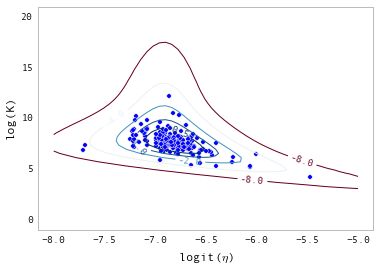

In [28]:
z = np.array([[betabin_trans((t1, t2), cancer.n, cancer.y) 
             for t2 in logit_eta_x] for t1 in log_K_x])
x, y = np.meshgrid(logit_eta_x, log_K_x)
cplot = plt.contour(x, y, z - z.max(), [-0.5, -1, -2, -4, -8], cmap=plt.cm.RdBu)
plt.clabel(cplot, inline=1, fontsize=10, fmt='%1.1f')
plt.ylabel('log(K)');plt.xlabel('logit($\eta$)')
plt.scatter(*sample.T[[1,0]])

Notice that the **efficiency** of rejection sampling is not very high for this problem.

In [29]:
float(sample.size)/nsamples

0.378

Rejection sampling is usually subject to declining performance as the dimension of the parameter space increases. Further improvement is gained by using **optimized algorithms** such as importance sampling which, as the name implies, samples more frequently from important areas of the distribution.

## Importance Sampling

As we have seen, the primary difficulty in Bayesian inference is calculating the posterior density for models of moderate-to-high dimension. For example, calculating the posterior mean of some function $h$ requires two difficult integration steps:

$$E[h(\theta) | y] = \frac{\int h(\theta)f(y|\theta) p(\theta) d\theta}{\int f(y|\theta) p(\theta) d\theta} = \frac{\int h(\theta)p(\theta | y) d\theta}{\int p(\theta|y) d\theta}$$

If the posterior $p(\theta|y)$ is a density from which it is easy to sample, we could approximiate these integrals using Monte Carlo simulation, but too often it is not.

Instead, assume that we can draw from a *tractable* probability density $q(\theta)$ that is some **approximation** of $p$. We could then write:

$$E[h(\theta) | y] = \frac{\int h(\theta) \frac{p(\theta|y)}{q(\theta)} q(\theta) d\theta}{\int \frac{p(\theta|y)}{q(\theta)} q(\theta) d\theta}$$

Expressed this way, $w(\theta) = p(\theta|y) / q(\theta)$ can be regarded as *weights* for the $M$ values of $\theta$ sampled from $q$ that we can use to correct the sample so that it approximates $h(\theta)$. Specifically, the **importance sampling estimate** of $E[h(\theta) | y]$ is:

$$\hat{h}_{is} = \frac{\sum_{i=1}^{M} h(\theta^{(i)})w(\theta^{(i)})}{\sum_{i=1}^{M} w(\theta^{(i)})}$$

where $\theta^{(i)}$ is the $i^{th}$ sample simulated from $q(\theta)$. The standard error for the importance sampling estimate is:

$$\text{SE}_{is} = \frac{\sqrt{\sum_{i=1}^{M} [(h(\theta^{(i)}) - \hat{h}_{is}) w(\theta^{(i)})]^2}}{\sum_{i=1}^{M} w(\theta^{(i)})}$$

The efficiency of importance sampling is related to the selection of the importance sampling distribution $q$.

### Example: Beta-binomial parameter

As a simple illustration of importance sampling, let's consider again the problem of estimating the parameters of the beta-binomial example. Here, we will use a multivariate T density as the simulation distribution $q$.

Here are 1000 sampled values to use for approximating the posterior:

In [30]:
theta = rmvt(4, var, mode, size=1000)

We can obtain the probability of these values under the posterior density:

In [31]:
f_theta = np.array([betabin_trans(t, cancer.n, cancer.y) for t in theta])

and under the T distribution:

In [32]:
q_theta = np.array([mvt(t, 4, var, mode) for t in theta])

This allows us to calculate the importance weights:

In [33]:
w = np.exp(f_theta - q_theta - max(f_theta - q_theta))

notice that we have subtracted the maximum value of the differences, which normalizes the weights.

Now, we can obtain estimates of the parameters:

In [34]:
theta_si = [(w*t).sum()/w.sum() for t in theta.T]
theta_si

[7.5908343153739564, -6.8151246023374883]

Finally, the standard error of the estimates:

In [35]:
se = [np.sqrt((((theta.T[i] - theta_si[i])* w)**2).sum()/w.sum()) for i in (0,1)]
se

[0.50639148589955096, 0.12211935805232961]

## Sampling Importance Resampling

The importance sampling method can be modified to incorporate **weighted bootstrapping**, in a procedure called sampling importance resampling (**SIR**). As previously, we obtain a sample of size $M$ from an importance sampling distribution $q$ and calculate the corresponding weights $w(\theta_i) = p(\theta|y) / q(\theta)$. 

Instead of directly re-weighting the samples from $q$, SIR instead transforms the weights into **probabilities** via:

$$p_i = \frac{w(\theta_i)}{\sum_{i=1}^M w(\theta_i)}$$

These probabilities are then used to **resample** their respective $\theta_i$ values, with replacement. This implies that the resulting resamples $\theta_i^{\prime}$ will be distributed approximately as the posterior $p(\theta|y)$.

Using again the beta-binomial example, we can take the weights calculated above, and convert them to probabilities:

In [36]:
p_sir = w/w.sum()

The `choice` function in `numpy.random` can be used to generate a random sample from an arbitrary 1-D array.

In [37]:
theta_sir = theta[np.random.choice(range(len(theta)), size=10000, p=p_sir)]

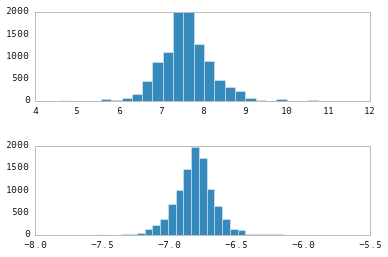

In [38]:
fig, axes = plt.subplots(2)
_ = axes[0].hist(theta_sir.T[0], bins=30)
_ = axes[1].hist(theta_sir.T[1], bins=30)

One advantage of this approach is that one can easily extract a **posterior probability interval** for each parameter, simply by extracting quantiles from the resampled values.

In [39]:
logK_sample = theta_sir[:,0]
logK_sample.sort()
logK_sample[[250, 9750]]

array([ 6.48985113,  8.90178469])

## Exercise: Model checking

Perform a Bayesian sensitivity analysis by performing SIR on the stomach cancer dataset $N$ times, with one observation (a city) removed from the dataset each time. Calculate and plot posterior medians and 95% posterior intervals for each $f(\theta|y_{(-i)})$ to visually analyze the influence of each observation.

In [40]:
# Write your anser here

## References

Chapter 6 of [Givens, Geof H.; Hoeting, Jennifer A. (2012-10-09). Computational Statistics (Wiley Series in Computational Statistics)](http://www.stat.colostate.edu/computationalstatistics/)

Chapter 5 of [Albert, J. (2009). Bayesian computation with R.](http://www.amazon.com/Bayesian-Computation-R-Use/dp/0387922970)